# Health System Resilience Analysis: How Pre-Pandemic Health Investment Impacted COVID-19 Outcomes in MERCOSUR

## Fuente de los datos

Los datos utilizados en este análisis provienen de la **API de Datos Abiertos del Banco Mundial (World Bank Open Data)**, una fuente oficial y actualizada de indicadores socioeconómicos y de salud a nivel mundial.

El uso de esta API permite garantizar la reproducibilidad del análisis y la actualización periódica de los datos.


In [1]:
# 1. Librerías de procesamiento de datos
import pandas as pd
import numpy as np

# 2. Librerías de Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Librería para peticiones API
import requests

# 4. Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Entorno de análisis configurado correctamente")


Entorno de análisis configurado correctamente


In [2]:
# Consulta a la API del Banco Mundial - Esperanza de Vida Argentina (ARG)
url = "https://api.worldbank.org/v2/country/ARG/indicator/SP.DYN.LE00.IN?format=json&per_page=100"

response = requests.get(url)
data = response.json()

# Creamos el DataFrame filtrando valores nulos
df_arg = pd.DataFrame([{
    "pais": r["country"]["value"],
    "año": int(r["date"]),
    "valor": round(r["value"], 2)
} for r in data[1] if r["value"] is not None])

# Ordenamos por año de forma ascendente
df_arg = df_arg.sort_values("año")

df_arg.head(10)

,pais,año,valor
63,Argentina,1960,64.24
62,Argentina,1961,64.63
61,Argentina,1962,64.62
60,Argentina,1963,64.86
59,Argentina,1964,64.82
58,Argentina,1965,65.05
57,Argentina,1966,65.40
56,Argentina,1967,65.47
55,Argentina,1968,65.23
54,Argentina,1969,65.08


### Nota metodológica

Se solicitan hasta 100 registros por consulta a la API del Banco Mundial para asegurar la obtención de la serie histórica completa en una única petición, evitando problemas de paginación.


## Descripción del indicador

- **SP.DYN.LE00.IN**: Esperanza de vida al nacer (total).  
  Representa el número promedio de años que se espera que viva una persona nacida en un año determinado, bajo las condiciones de mortalidad vigentes.


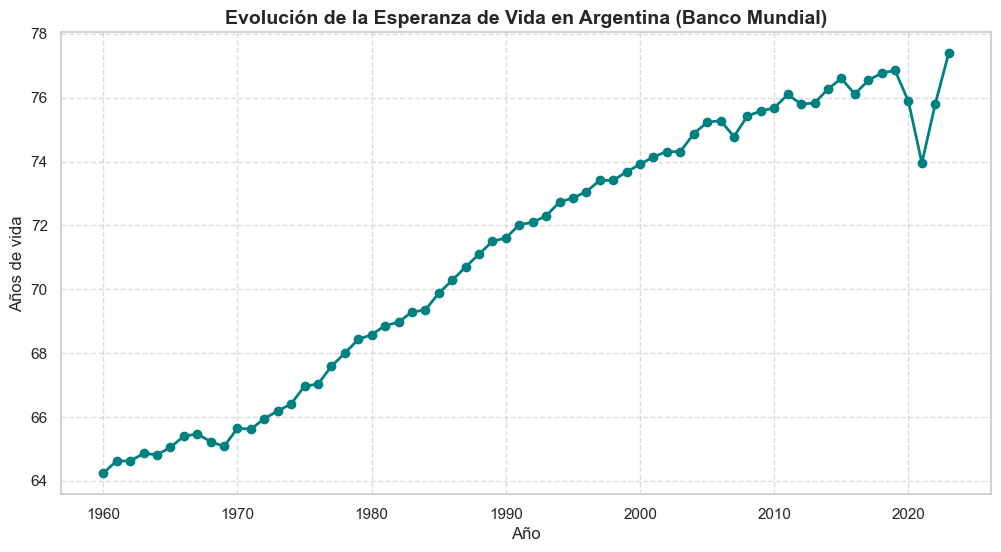

In [3]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de línea
plt.plot(df_arg["año"], df_arg["valor"], marker="o", linestyle="-", color="teal", linewidth=2)

# Personalización profesional
plt.title("Evolución de la Esperanza de Vida en Argentina (Banco Mundial)", fontsize=14, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Años de vida", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

### 📊 Análisis de la Evolución: Argentina
Al observar el gráfico de esperanza de vida, podemos destacar tres puntos clave:

1. **Tendencia Histórica:** Se observa un crecimiento sostenido desde la década de los 60, reflejando mejoras en el sistema de salud y condiciones de vida.
2. **Impacto Reciente (COVID-19):** Es claramente visible una caída o estancamiento en los valores correspondientes a **2020 y 2021**. Este fenómeno es una anomalía estadística causada por la pandemia global.
3. **Recuperación:** Los datos más recientes comienzan a mostrar una estabilización, aunque el análisis permitirá ver si se retoma la pendiente de crecimiento previa.

## Próximos pasos

Una vez analizada la evolución histórica de la esperanza de vida en Argentina, el siguiente paso será comparar estos resultados con otros países del MERCOSUR (Brasil, Uruguay y Paraguay), con el objetivo de identificar patrones regionales y diferencias estructurales.


In [4]:
# 1. Definimos los países del MERCOSUR
paises = {
    'ARG': 'Argentina',
    'BRA': 'Brasil',
    'URY': 'Uruguay',
    'PRY': 'Paraguay'
}

datos_mercosur = []

# 2. Bucle de extracción automática
for iso, nombre in paises.items():
    url = f"https://api.worldbank.org/v2/country/{iso}/indicator/SP.DYN.LE00.IN?format=json&per_page=100"
    response = requests.get(url)
    data = response.json()
    
    for r in data[1]:
        if r["value"] is not None:
            datos_mercosur.append({
                "pais": nombre,
                "año": int(r["date"]),
                "esperanza_vida": round(r["value"], 2)
            })  

# 3. Creación y ordenamiento del DataFrame
df_mercosur = pd.DataFrame(datos_mercosur)
df_mercosur = df_mercosur.sort_values(["pais", "año"])

print("✅ Datos del MERCOSUR descargados y ordenados correctamente")

✅ Datos del MERCOSUR descargados y ordenados correctamente


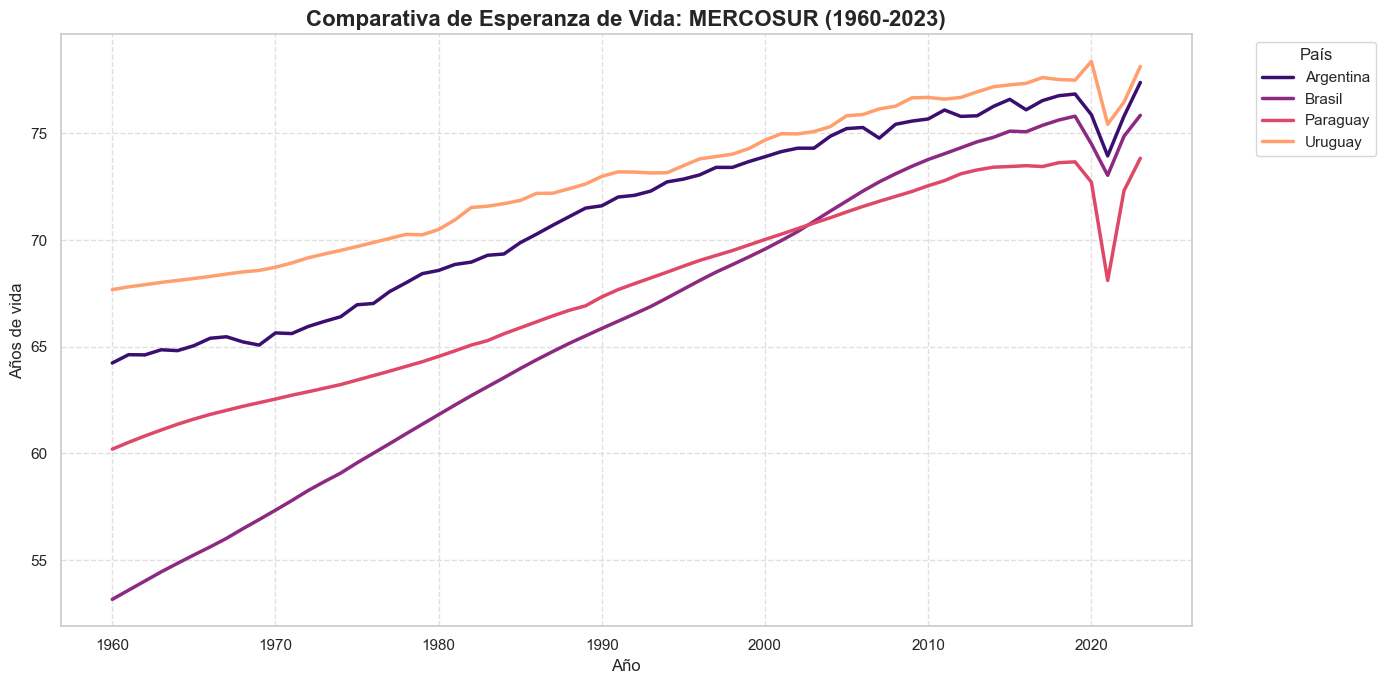

In [5]:
plt.figure(figsize=(14, 7))

# Graficamos las 4 líneas simultáneamente
sns.lineplot(data=df_mercosur, x="año", y="esperanza_vida", hue="pais", palette="magma", linewidth=2.5)

plt.title("Comparativa de Esperanza de Vida: MERCOSUR (1960-2023)", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Años de vida", fontsize=12)
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 🧠 Insights Principales del MERCOSUR

- **Liderazgo Regional:** Uruguay mantiene históricamente la esperanza de vida más alta del bloque, superando los 78 años en la última década.
- **Convergencia:** Se observa que Brasil ha tenido la aceleración más notable, acortando la brecha con Argentina y Uruguay desde los años 60.
- **Impacto Pandémico:** Todos los países muestran un "quiebre" visible en la tendencia alcista durante 2020-2021, confirmando el impacto demográfico transversal del COVID-19 en la región.

In [6]:
import os

# Creamos la carpeta si no existe y guardamos el CSV
ruta = "../data/processed"
os.makedirs(ruta, exist_ok=True)

df_mercosur.to_csv(f"{ruta}/mercosur_life_expectancy.csv", index=False)

print(f"✅ Dataset procesado guardado en: {ruta}/mercosur_life_expectancy.csv")

✅ Dataset procesado guardado en: ../data/processed/mercosur_life_expectancy.csv


In [7]:
# Análisis de impacto: ¿Cuántos años de esperanza de vida se perdieron?
años_analisis = [2019, 2021]
df_impacto = df_mercosur[df_mercosur['año'].isin(años_analisis)]

# Pivot para comparar
df_delta = df_impacto.pivot(index='pais', columns='año', values='esperanza_vida')
df_delta['caida_absoluta'] = df_delta[2021] - df_delta[2019]

print("📊 Análisis de Resiliencia: Caída en años de vida (2019-2021)")
df_delta.sort_values('caida_absoluta')

📊 Análisis de Resiliencia: Caída en años de vida (2019-2021)


año,2019,2021,caida_absoluta
pais,,,
Paraguay,73.67,68.11,-5.56
Argentina,76.85,73.95,-2.90
Brasil,75.81,73.04,-2.77
Uruguay,77.50,75.43,-2.07


C:\Users\navia\AppData\Local\Temp\ipykernel_13888\4174164605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_delta.index, y=df_delta['caida_absoluta'], palette='Reds_r')


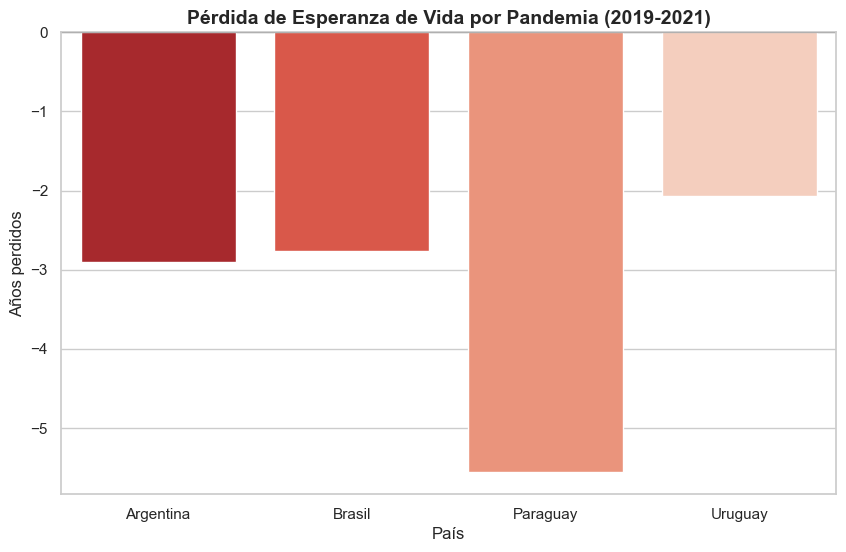

In [8]:
plt.figure(figsize=(10, 6))

# Graficamos la caída
sns.barplot(x=df_delta.index, y=df_delta['caida_absoluta'], palette='Reds_r')

plt.title("Pérdida de Esperanza de Vida por Pandemia (2019-2021)", fontsize=14, fontweight='bold')
plt.ylabel("Años perdidos")
plt.xlabel("País")
plt.axhline(0, color='black', linewidth=0.8) # Línea en el cero

plt.show()

In [9]:
def obtener_datos_bm(indicador, nombre_columna):
    """
    Función optimizada para extraer indicadores del Banco Mundial para el MERCOSUR.
    """
    paises_dict = {'ARG': 'Argentina', 'BRA': 'Brasil', 'URY': 'Uruguay', 'PRY': 'Paraguay'}
    datos_lista = []
    
    for iso, nombre in paises_dict.items():
        url = f"https://api.worldbank.org/v2/country/{iso}/indicator/{indicador}?format=json&per_page=100"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            
            if data and len(data) > 1:
                for r in data[1]:
                    if r["value"] is not None:
                        datos_lista.append({
                            "pais": nombre,
                            "año": int(r["date"]),
                            nombre_columna: round(r["value"], 2)
                        })
        except Exception as e:
            print(f"Error al obtener {nombre}: {e}")
            
    return pd.DataFrame(datos_lista)

In [10]:
# 1. Extraemos el gasto en salud
df_gasto = obtener_datos_bm("SH.XPD.CHEX.GD.ZS", "gasto_salud_pbi")

# 2. Obtenemos el gasto del último año pre-pandemia (2019)
gasto_2019 = df_gasto[df_gasto['año'] == 2019][['pais', 'gasto_salud_pbi']]

# 3. Unimos con tu tabla df_delta anterior (donde tienes la 'caida_absoluta')
# Nota: Si df_delta tiene a 'pais' como índice, usamos left_index=True
df_correlacion = df_delta.merge(gasto_2019, left_index=True, right_on='pais')

print("📊 Correlación: Inversión en Salud vs. Resiliencia Pandémica")
df_correlacion[['pais', 'gasto_salud_pbi', 'caida_absoluta']].sort_values('gasto_salud_pbi', ascending=False)

📊 Correlación: Inversión en Salud vs. Resiliencia Pandémica


,pais,gasto_salud_pbi,caida_absoluta
4,Argentina,10.12,-2.90
28,Brasil,9.61,-2.77
52,Uruguay,9.24,-2.07
76,Paraguay,7.16,-5.56


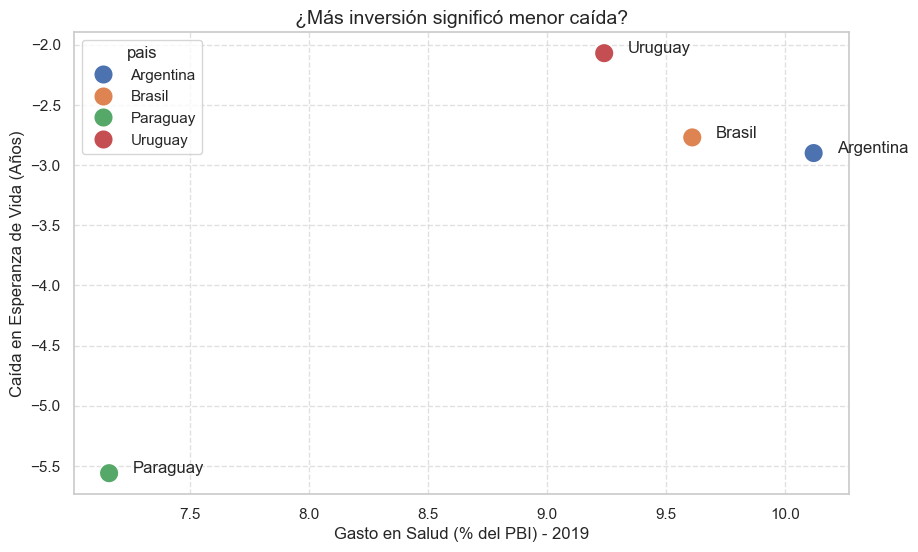

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_correlacion, x='gasto_salud_pbi', y='caida_absoluta', hue='pais', s=200)

plt.title("¿Más inversión significó menor caída?", fontsize=14)
plt.xlabel("Gasto en Salud (% del PBI) - 2019")
plt.ylabel("Caída en Esperanza de Vida (Años)")
plt.grid(True, linestyle='--', alpha=0.6)

# Añadir etiquetas de texto a cada punto
for i in range(df_correlacion.shape[0]):
    plt.text(df_correlacion.gasto_salud_pbi.iloc[i]+0.1, 
             df_correlacion.caida_absoluta.iloc[i], 
             df_correlacion.pais.iloc[i])

plt.show()